## cnn 입문

In [2]:
from fastai.vision.all import * 

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
# 탐색... 여러파일들이 있기는함.. 
# Abyssinian_1.jpg 를 보고싶다면? 
PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'

In [ ]:
files= get_image_files(path)
files

In [ ]:
print(files[8])
PILImage.create(files[8])

In [ ]:
def label_func(fname):
  if fname[0].isupper():
    return 'cat'
  else:
    return 'dog'

In [ ]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224))
# path 경로에서 
# files 에 해당하는 파일들을 불러와서 X를 만들고 
# item_tfms 에 정의된 방식으로 X를 변환하여 저장한다. 그리고 
# label_func: "파일이름" -> "라벨", 에 저장된 함수내용을 바탕으로 y를 만들어 저장한다. 
# 이 모든것이 저장된 자료는 변수 dls에 저장한다. 

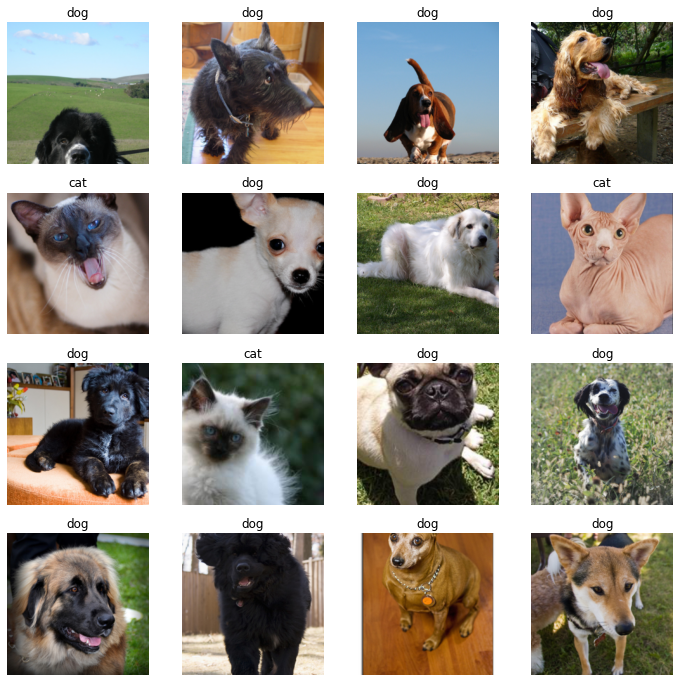

In [ ]:
dls.show_batch(max_n = 16)

In [ ]:
clsfr = cnn_learner(dls,resnet34,metrics = error_rate)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
clsfr.fine_tune(1) # 학습을 하는 함수

epoch,train_loss,valid_loss,error_rate,time
0,0.140378,0.018366,0.006089,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.056512,0.029088,0.008119,01:01


In [ ]:
files[0] # 강아지

Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_134.jpg')

In [ ]:
clsfr.predict(files[0])

('dog', TensorBase(1), TensorBase([3.4943e-07, 1.0000e+00]))

In [ ]:
clsfr.predict(files[8])

('cat', TensorBase(0), TensorBase([1.0000e+00, 3.0730e-09]))

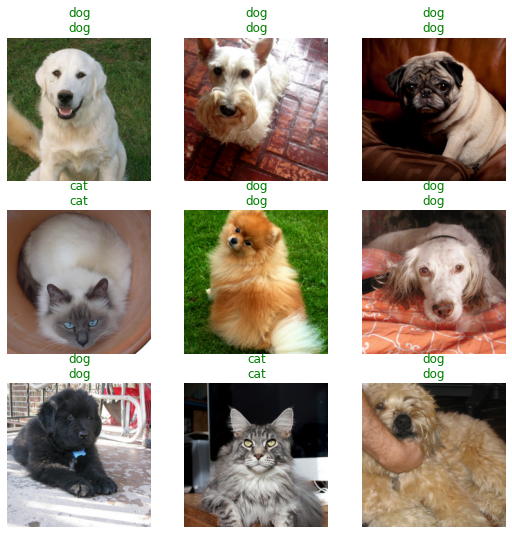

In [ ]:
clsfr.show_results()

오답 분석

In [ ]:
interpreter = Interpretation.from_learner(clsfr) # 오답을 분석하는 오브젝트를 만듬.. 재료는 클래시파이어! 

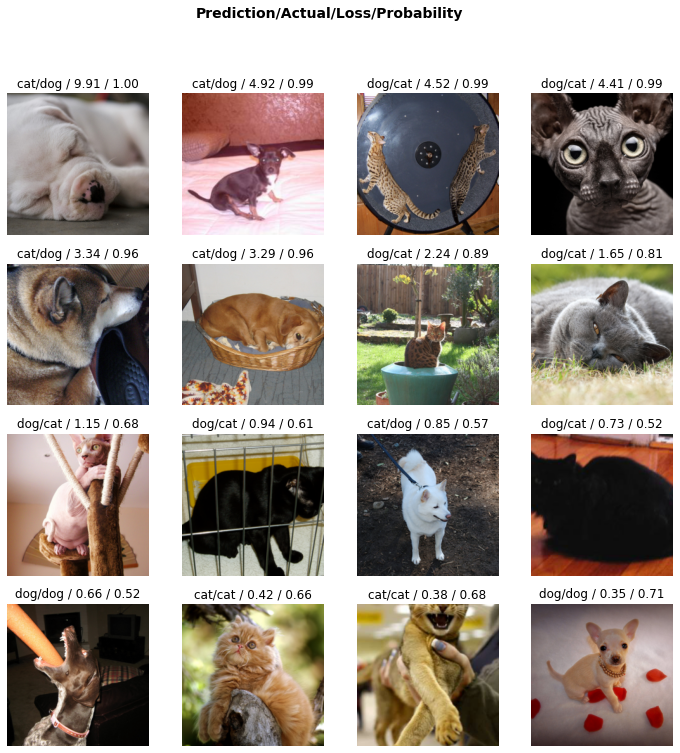

In [ ]:
interpreter.plot_top_losses(16) # 오답을 분석하는 오브젝트는 가장 오류가 높은 이미지를 정렬하여 보여주는 기능이 있음..

이거 오버피팅된 모델 아니야?

내가 가진 사진으로 확인해보자!

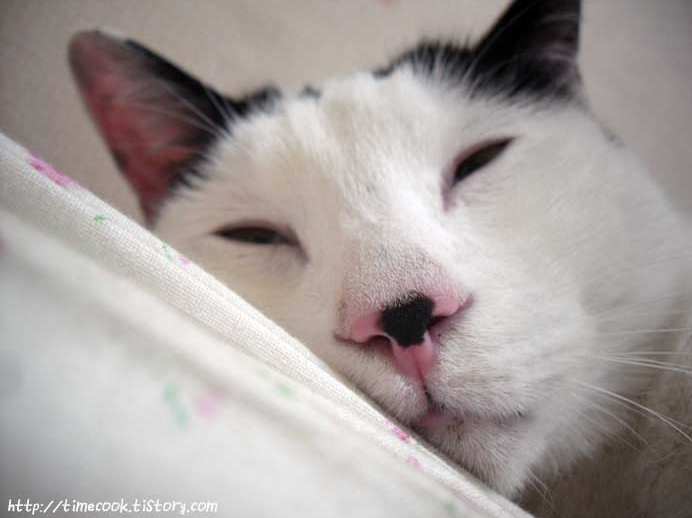

In [ ]:
PILImage.create('/root/cell-36-output-1.png')

In [ ]:
clsfr.predict('/root/cell-36-output-1.png')

('cat', TensorBase(0), TensorBase([1.0000e+00, 4.3733e-11]))

#  CNN 1주차  

In [ ]:
import torch 
import torchvision
from fastai.vision.all import * 
import time

In [ ]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');

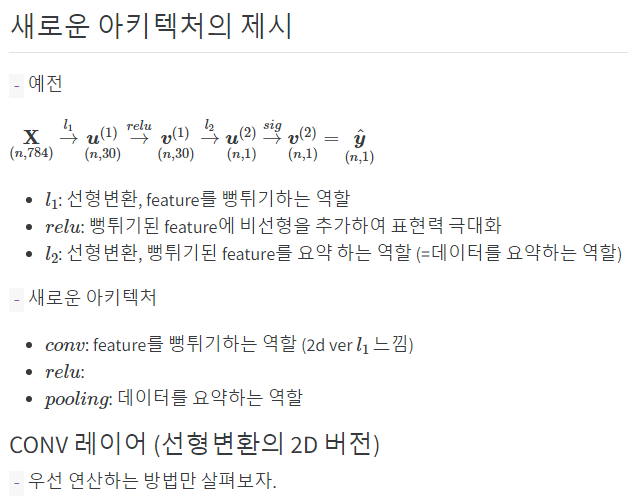

In [ ]:
torch.manual_seed(43052)
_conv = torch.nn.Conv2d(1,1,(2,2)) # 입력1, 출력1, (2,2) window size
#Conv2d는 linear 함수랑 동일 한 역할
_conv.weight.data, _conv.bias.data
# _conv 함수의 두 파라미터 -> 가중치 , 편향 값

(tensor([[[[-0.1733, -0.4235],
           [ 0.1802,  0.4668]]]]), tensor([0.2037]))

In [ ]:
_X = torch.arange(0,4).reshape(1,2,2).float()
_X

tensor([[[0., 1.],
         [2., 3.]]])

In [ ]:
_conv(_X)

# _X에 _conv 함수의 가중치를 곱한후 편향값을 더해준값

tensor([[[1.5410]]], grad_fn=<SqueezeBackward1>)

In [ ]:
(-0.1733)*0 + (-0.4235)*1 +\
(0.1802)*2 + (0.4668)*3 + 0.2037

1.541

In [ ]:
_X = torch.arange(0,25).float().reshape(1,5,5) 
_X

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.],
         [20., 21., 22., 23., 24.]]])

In [ ]:
_conv(_X)

tensor([[[3.4820, 3.5321, 3.5823, 3.6324],
         [3.7327, 3.7829, 3.8330, 3.8832],
         [3.9835, 4.0336, 4.0838, 4.1339],
         [4.2342, 4.2844, 4.3345, 4.3846]]], grad_fn=<SqueezeBackward1>)

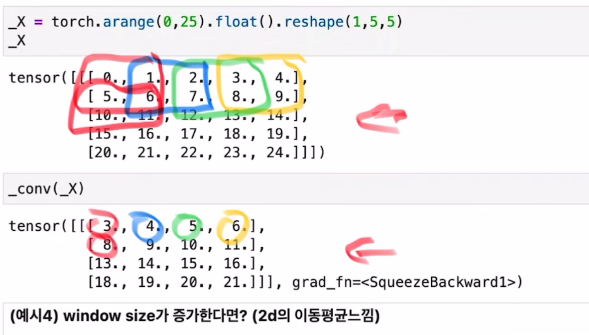

In [ ]:
_conv = torch.nn.Conv2d(1,1,(3,3))

_conv.bias.data = torch.tensor([0.0])

#평균
_conv.weight.data = torch.tensor([[[[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]]])

In [ ]:
_conv(_X)

tensor([[[ 6.0000,  7.0000,  8.0000],
         [11.0000, 12.0000, 13.0000],
         [16.0000, 17.0000, 18.0000]]], grad_fn=<SqueezeBackward1>)

In [ ]:

_X = torch.tensor([1.0,1.0,1.0,1.0]).reshape(1,2,2)
_X

tensor([[[1., 1.],
         [1., 1.]]])

In [ ]:
_conv = torch.nn.Conv2d(1,8,(2,2))
_conv.weight.data.shape,_conv.bias.data.shape

(torch.Size([8, 1, 2, 2]), torch.Size([8]))

In [ ]:
_conv = torch.nn.Conv2d(1,8,(2,2))
_conv.weight.data.shape,_conv.bias.data.shape

(torch.Size([8, 1, 2, 2]), torch.Size([8]))

In [ ]:
_X

tensor([[[1., 1.],
         [1., 1.]]])

In [ ]:
_conv(_X).reshape(-1)

tensor([-0.3019,  1.0674, -0.4555,  0.7535,  0.3172,  1.1538,  0.4305, -0.1079],
       grad_fn=<ReshapeAliasBackward0>)

In [ ]:
torch.sum(_conv.weight.data[0,...])+_conv.bias.data[0],\
torch.sum(_conv.weight.data[1,...])+_conv.bias.data[1]

(tensor(-0.3019), tensor(1.0674))

In [ ]:

torch.sum(_conv.weight.data,axis=(2,3)).reshape(-1)+ _conv.bias.data

tensor([-0.3019,  1.0674, -0.4555,  0.7535,  0.3172,  1.1538,  0.4305, -0.1079])

## relu(2d)

# 새 섹션

In [ ]:
_X = torch.randn(25).reshape(1,5,5)
_X

tensor([[[-0.7246, -0.5727,  0.1855, -1.2312, -0.1458],
         [ 1.0393, -0.2775, -0.0559, -1.9606, -1.6696],
         [ 0.4431, -1.4405, -1.8241, -0.9459, -0.5284],
         [ 0.0079,  0.4249,  1.1723, -0.3936,  1.6424],
         [-0.2472, -0.8344,  0.2274,  1.0516,  1.3755]]])

In [ ]:

a1=torch.nn.ReLU()

In [ ]:
a1(_X)

tensor([[[0.0000, 0.0000, 0.1855, 0.0000, 0.0000],
         [1.0393, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.4431, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0079, 0.4249, 1.1723, 0.0000, 1.6424],
         [0.0000, 0.0000, 0.2274, 1.0516, 1.3755]]])

## maxpooling

In [ ]:
_maxpooling = torch.nn.MaxPool2d((2,2))

In [ ]:
_X = torch.arange(16).float().reshape(1,4,4)

In [ ]:
_X


tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.]]])

In [ ]:
 _maxpooling(_X) 

tensor([[[ 5.,  7.],
         [13., 15.]]])

맥스 풀링은 데이터를 버린다는 개념!



dnn에서 마지막 리니어 펑션에서 아웃풋 개수 만큼 데이터 축약시키는데 그거랑 비슷한 개념으로 보면 된다


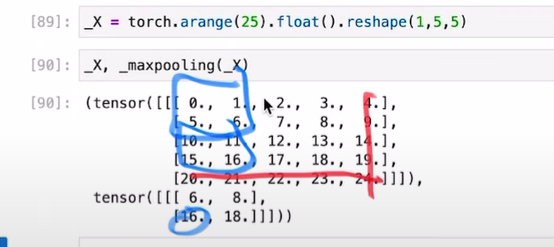

빨간 두줄은 가져다가 버린다


## CNN 실습

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X = torch.concat([X0,X1])/255
y = torch.tensor([0.0]*len(X0) + [1.0]*len(X1)).reshape(-1,1)

In [ ]:
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
XX = torch.concat([X0,X1])/255
yy = torch.tensor([0.0]*len(X0) + [1.0]*len(X1)).reshape(-1,1)

### (1) Conv2d -> 데이터 뻥튀기 , dnn 리니어 펑션역활

In [ ]:
c1 = torch.nn.Conv2d(1,16,(5,5))
# 레이어 생성

print(X.shape)
print(c1(X).shape)
# c1을 거치고 데이터가 뻥튀기 된다.

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])


### (2) relu

In [ ]:
a1 = torch.nn.ReLU()
print(X.shape)
print(c1(X).shape)
print(a1(c1(X)).shape)

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 24, 24])


### (3) MaxPool2D

In [ ]:
m1 =  torch.nn.MaxPool2d((2,2)) 
print(X.shape)
print(c1(X).shape)
print(a1(c1(X)).shape)
print(m1(a1(c1(X))).shape)

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 12, 12])


### (4) 적당히 마무리하고 시그모이드 태우자

일반 데이터를 펼지는 거먼저

* 방법 1

In [ ]:
m1(a1(c1(X))).shape

torch.Size([12665, 16, 12, 12])

In [ ]:
16*12*12

2304

In [ ]:
m1(a1(c1(X))).reshape(-1,2304).shape

torch.Size([12665, 2304])

* 방법2 -> 이게 더좋다

In [ ]:
flttn = torch.nn.Flatten

In [ ]:
flttn(m1(a1(c1(X)))).shape

torch.Size([12665, 2304])

`-` 이제 펼쳤으니 아웃풋 개수 만큼 차원축소하는 선형레이어를 만들자


In [ ]:
l1 = torch.nn.Linear(in_features=2304,out_features=1) 

In [ ]:
print(X.shape) # 데이터
print(c1(X).shape) # 선형변환, 피쳐 뻥튀기
print(a1(c1(X)).shape) # 렐루 비선형변환
print(m1(a1(c1(X))).shape) # 맥스풀링 데이터요약
print(flttn(m1(a1(c1(X)))).shape)# 2d -> 1d
print(l1(flttn(m1(a1(c1(X))))).shape) # 1d 선형변환 

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 12, 12])
torch.Size([12665, 2304])
torch.Size([12665, 1])


`-` 시그모이드

In [ ]:
a2 = torch.nn.Sigmoid()

### `-` 네트워크 설계

In [ ]:
net = torch.nn.Sequential(
    c1, # 2d: 컨볼루션(선형변환), 피처 뻥튀기 
    a1, # 2d: 렐루(비선형변환)
    m1, # 2d: 맥스풀링: 데이터요약
    flttn, # 2d->1d 
    l1, # 1d: 선형변환
    a2 # 1d: 시그모이드(비선형변환) 
)

In [ ]:
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
t1= time.time()
for epoc in range(100): 
    ## 1
    yhat = net(X) 
    ## 2
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()
t2= time.time()
t2-t1

361.15986609458923

Text(0.5, 1.0, 'Traning Set')

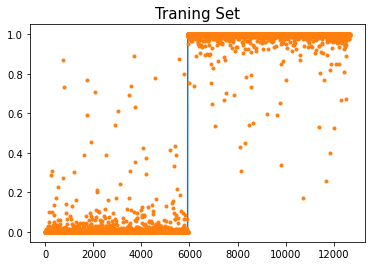

In [ ]:
plt.plot(y)
plt.plot(net(X).data,'.')
plt.title('Traning Set',size=15)

Text(0.5, 1.0, 'Test Set')

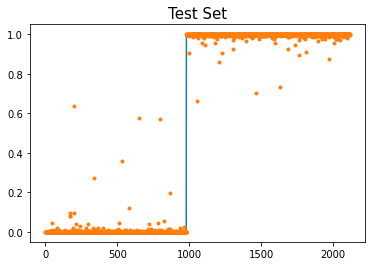

In [ ]:
plt.plot(yy)
plt.plot(net(XX).data,'.')
plt.title('Test Set',size=15)

## CNN 구현 GPU

###.1. dls

In [ ]:
ds1=torch.utils.data.TensorDataset(X,y)
ds2=torch.utils.data.TensorDataset(XX,yy)

In [ ]:
X.shape

torch.Size([12665, 1, 28, 28])

In [ ]:
len(X)/10 #TRAIN DATA는  배치로 나눠서 학습

1266.5

In [ ]:
len(XX) # TEST DATA 

2115

배치로 나누면 단점이 코드가 지저분해짐 -> for문 두번

이를 대안하는 fastai 에 구현된 코드가 있다 이말이야


In [ ]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=1266) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=2115) 

In [ ]:
dls = DataLoaders(dl1,dl2) # 이거 fastai 지원함수입니다 

# train, test 데이터 로드를 하나의 dataloader로 만드는 작업

###  2. lrnr 생성: 아키텍처, 손실함수, 옵티마이저

In [ ]:
Learner(dls,net,loss_fn)

# 옵티마이저 디폴드 값이 adam이라 따로 선언 하지 않는다 

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2304,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()

### 3.학습

In [ ]:
lrnr = Learner(dls,net,loss_fn)

In [ ]:
lrnr.fit(10) 

epoch,train_loss,valid_loss,time
0,0.898642,0.637372,00:06
1,0.697798,0.444921,00:00
2,0.561106,0.272669,00:00
3,0.444167,0.134264,00:00
4,0.344059,0.066185,00:00
5,0.266754,0.038426,00:00
6,0.209190,0.026162,00:00
7,0.166114,0.019772,00:00
8,0.133379,0.015907,00:00
9,0.108123,0.013321,00:00


### 4. 예측및 시각화

In [ ]:
net[0].weight

Parameter containing:
tensor([[[[ 1.4470e-01, -2.5231e-02,  1.1750e-01, -1.7232e-01, -1.7152e-01],
          [-1.9094e-01, -1.9353e-01,  1.8668e-01,  7.9295e-02,  1.2811e-01],
          [ 1.6966e-01, -1.3759e-01, -5.3920e-02, -4.5414e-02, -8.8590e-02],
          [-7.2274e-02, -2.1924e-02,  2.1587e-02, -2.0235e-01,  2.3186e-02],
          [-1.3966e-01, -4.9494e-02, -1.6945e-01, -1.7716e-01,  1.4964e-01]]],


        [[[-7.5662e-02,  2.8920e-02,  4.4515e-03,  7.0352e-02,  1.9995e-01],
          [-1.9555e-01,  8.0987e-02,  9.2346e-02,  8.0827e-02,  9.7009e-02],
          [-1.1870e-01,  1.8660e-01,  6.1226e-03, -2.3610e-03,  2.5122e-01],
          [-3.0954e-02, -7.7801e-02,  2.0151e-01, -2.7130e-02, -1.1952e-01],
          [-4.0891e-02,  2.5464e-01, -3.9776e-02, -1.1344e-02, -8.7623e-04]]],


        [[[-1.7645e-01,  1.0870e-01,  1.7586e-01,  1.8921e-01,  1.6411e-01],
          [-1.2554e-01,  6.2721e-02,  1.3498e-01,  2.3403e-01,  9.8848e-02],
          [ 2.8392e-02,  7.1675e-02, -9.9331e-

위는 conv2d의 가중치 인데 가중치 업데이트 하는 곳이 쿠다로 되어 있음 

이건 개신기한게 내가 쿠다로 지정안해도 알아서 올라갔다 내려갔다함

In [ ]:
net.to("cpu") 

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=2304, out_features=1, bias=True)
  (5): Sigmoid()
)

Text(0.5, 1.0, 'Training Set')

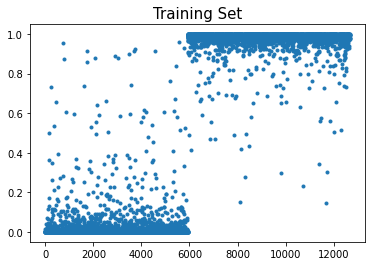

In [ ]:
plt.plot(net(X).data,'.')
plt.title("Training Set",size=15)

Text(0.5, 1.0, 'Test Set')

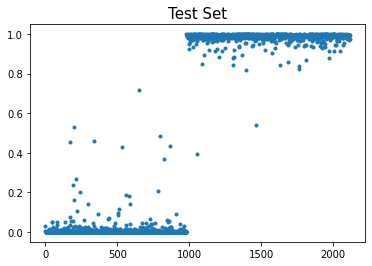

In [ ]:
plt.plot(net(XX).data,'.')
plt.title("Test Set",size=15)

## BCEWithLogitsLoss

- BCEWithLogitsLoss = Sigmoid + BCELoss - 왜 써요? 수치적으로 더 안정

### 1.dls 만들기



In [ ]:
ds1=torch.utils.data.TensorDataset(X,y)
ds2=torch.utils.data.TensorDataset(XX,yy)

In [ ]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=1266) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=2115) 

In [ ]:
dls = DataLoaders(dl1,dl2) # 이거 fastai 지원함수입니다

### 2. lrnr 생성

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2304,1),
    #torch.nn.Sigmoid() -> dcewithlogitsloss 를 사용하기에 시그모이드 레이어는ㅍ 필요없다.
)
loss_fn = torch.nn.BCEWithLogitsLoss()
lrnr = Learner(dls,net,loss_fn) 

### 3. 학습

In [ ]:
lrnr.fit(10)

epoch,train_loss,valid_loss,time
0,0.909347,0.616088,00:00
1,0.667474,0.406475,00:00
2,0.528093,0.254511,00:00
3,0.418963,0.127482,00:00
4,0.325567,0.065542,00:00
5,0.253158,0.039355,00:00
6,0.198953,0.027171,00:00
7,0.158296,0.020706,00:00
8,0.127369,0.016754,00:00
9,0.103480,0.014074,00:00


# cnn 진짜 개실습


In [ ]:
import torch 
import torchvision
import numpy as np
from fastai.vision.all import * 

In [ ]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');

In [ ]:
path = untar_data(URLs.CIFAR)


In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/cifar10/labels.txt'),Path('/root/.fastai/data/cifar10/test'),Path('/root/.fastai/data/cifar10/train')]